In [20]:
import numpy as np
import pandas as pd
from plotnine import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

In [21]:
def euclid_dist(coord1,coord2): # pass coordinates that are in form of a list
    summ=0;
    if (len(coord1)!=len(coord2)):
        raise ValueError("error: dimension mismatch")
    for i in range(len(coord1)):
        summ+=(coord1[i]-coord2[i])**2
    return np.sqrt(summ) 

In [22]:
def K_Means_2D(input_df, K, centroids=False, plotonly=False): 
    
    data = input_df.copy()
    
    if (len(data.columns) != 2):
        raise ValueError("Error: input data should be 2-dimensional")
        
    data.columns=['x','y']
    
    if (centroids==False): # If initial centroids are not explicitly specified,
        centroids = data.sample(K, replace=False).values.tolist()# randomly pick K samples from input data
    if (len(centroids) != K): 
                    raise ValueError("Error: Number of initial centroids must match K")
    
    data_ls = data.values.tolist()
    data["cluster"] = np.nan # add a cluster column to data

    if (plotonly==False):
        print("\niteration:", 0)
        print("centroids: ", centroids)
        print(data)
    
    iteration = 1
    prev_centroids = []
    while (centroids != prev_centroids): # Iterate until centroids don't change
        for i in range(len(data_ls)): 
                dist_ls=[]
                for centr in centroids:
                    dist_ls.append(euclid_dist(data_ls[i], centr)) # calculate euclid distance of data point and centroid
                data.loc[i, "cluster"] = dist_ls.index(min(dist_ls))+1 # assign data point to the closest centroid 
                    
        prev_centroids = centroids # save previous centroids (for comparison with updated centroids)
        centroids = data.groupby("cluster").mean().values.tolist()  # update(recompute) the centroid of each cluster
        
        # calculate SSE 
        SSE = 0
        for clust_idx in range(1, len(centroids)+1): # For each data cluster
            data_by_cluster= data[data.cluster==clust_idx].loc[:,data.columns!="cluster"].values.tolist()
            for coord in data_by_cluster: # For each data in a particular cluster
                SSE+=(euclid_dist(coord,centroids[clust_idx-1]))**2 #"Sum of Squared Error"=="Sum of Squared Euclid Dists" 
            
        # print the numerical results of updated centroids, data by cluster, SSE    
        if (plotonly==False):
            print("\niteration:", iteration); iteration+=1
            print("centroids: ", centroids)
            print("SSE:", SSE) 
            print(data) 
        # print only the plot result
        else:
            print("\niteration:", iteration); iteration+=1
            centroids_df = pd.DataFrame(centroids, columns=['x','y']); centroids_df['cluster']=0;
            plot= ggplot(data)+aes(x ='x',y='y',color='cluster')+geom_point(size=4,show_legend=False)+\
                  geom_point(aes(x='x',y='y',color="cluster"),data=centroids_df,shape=5,size=4,show_legend=False)+\
                  theme("none") 
            print(plot)
            
    return data


In [23]:
x = [1,1,2,2,3,4,5,6]
y = [1,2,1,3,3,5,4,5]
df = pd.DataFrame(list(zip(x, y)),columns =['x', 'y']) 

### Input data

In [24]:
df

,x,y
0,1,1
1,1,2
2,2,1
3,2,3
4,3,3
5,4,5
6,5,4
7,6,5


### Numerical results

In [25]:
data = K_Means_2D(df, 3, [[2,3],[3,3],[5,4]], False)


iteration: 0
centroids:  [[2, 3], [3, 3], [5, 4]]
   x  y  cluster
0  1  1      NaN
1  1  2      NaN
2  2  1      NaN
3  2  3      NaN
4  3  3      NaN
5  4  5      NaN
6  5  4      NaN
7  6  5      NaN

iteration: 1
centroids:  [[1.5, 1.75], [3.0, 3.0], [5.0, 4.666666666666667]]
SSE: 6.416666666666666
   x  y  cluster
0  1  1      1.0
1  1  2      1.0
2  2  1      1.0
3  2  3      1.0
4  3  3      2.0
5  4  5      3.0
6  5  4      3.0
7  6  5      3.0

iteration: 2
centroids:  [[1.3333333333333333, 1.3333333333333333], [2.5, 3.0], [5.0, 4.666666666666667]]
SSE: 4.499999999999999
   x  y  cluster
0  1  1      1.0
1  1  2      1.0
2  2  1      1.0
3  2  3      2.0
4  3  3      2.0
5  4  5      3.0
6  5  4      3.0
7  6  5      3.0

iteration: 3
centroids:  [[1.3333333333333333, 1.3333333333333333], [2.5, 3.0], [5.0, 4.666666666666667]]
SSE: 4.499999999999999
   x  y  cluster
0  1  1      1.0
1  1  2      1.0
2  2  1      1.0
3  2  3      2.0
4  3  3      2.0
5  4  5      3.0
6  5  4   

### Graphical Results


iteration: 1


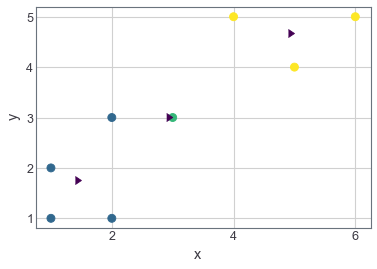

<ggplot: (88630252720)>

iteration: 2


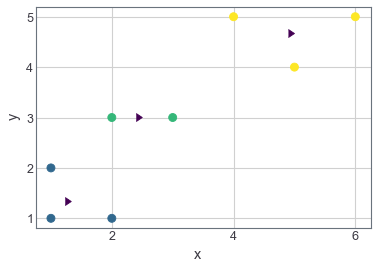

<ggplot: (88629240275)>

iteration: 3


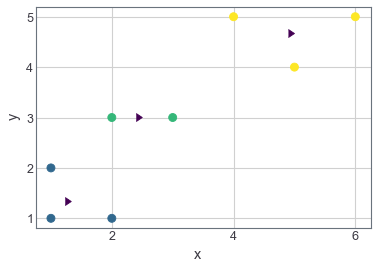

<ggplot: (-9223371948225521113)>


In [26]:
data = K_Means_2D(df, 3, [[2,3],[3,3],[5,4]], True)